In [28]:
import sys

import matplotlib.pyplot as plt
import iris
import iris.plot as iplt
import numpy as np
import cartopy.crs as ccrs

sys.path.append('/home/599/dbi599/ocean-analysis/modules')
import general_io as gio


In [54]:
cumulative_anomaly_file = '/g/data/e14/dbi599/CMIP5/CMIP/CCCma/CanESM2/historical/r1i1p1/Ayr/pe/gn/v20120718/pe-anomaly_Ayr_CanESM2_historical_r1i1p1_gn_185001-200512-cumsum.nc'
anom_cube, anom_history = gio.combine_files(cumulative_anomaly_file, 'precipitation_minus_evaporation_flux')
time_constraint = gio.get_time_constraint(['1861-01-01', '2005-12-31'])   
anom_cube = anom_cube.extract(time_constraint)
start_data = anom_cube.data[0, ::]
anom_cube = anom_cube[-1, ::] 
anom_cube.data = anom_cube.data - start_data 

In [10]:
control_file = '/g/data/e14/dbi599/CMIP5/CMIP/CCCma/CanESM2/piControl/r1i1p1/Amon/pe/gn/v20120623/pe_Amon_CanESM2_piControl_r1i1p1_gn_201501-301012.nc'
clim_cube, clim_history = gio.combine_files(control_file, 'precipitation_minus_evaporation_flux')
clim_cube = clim_cube.collapsed('time', iris.analysis.MEAN)
clim_cube.remove_coord('time')

clim_cube.data = clim_cube.data * 86400
clim_cube.units = 'mm/day'

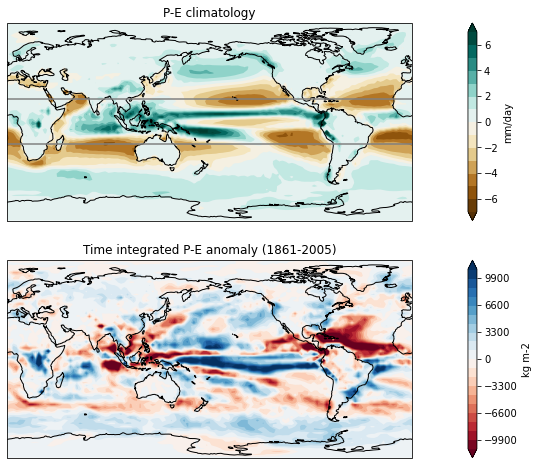

In [69]:
fig = plt.figure(figsize=(20, 8))
                
plt.subplot(2, 1, 1, projection=ccrs.PlateCarree(central_longitude=180.0))
iplt.contourf(clim_cube,
              levels=np.arange(-7, 8, 1),
              extend="both",
              cmap='BrBG')
cbar = plt.colorbar()
cbar.set_label('mm/day')  #, rotation=270)
plt.gca().coastlines()
lons = np.arange(-180, 180, 0.5)
lats_sh = np.repeat(-20, len(lons))
lats_nh = np.repeat(20, len(lons))
plt.plot(lons, lats_sh, color='0.5') # linestyle, linewidth
plt.plot(lons, lats_nh, color='0.5')
plt.title('P-E climatology')
plt1_ax = plt.gca()

plt.subplot(2, 1, 2, projection=ccrs.PlateCarree(central_longitude=180.0))
iplt.contourf(anom_cube,
              levels=np.arange(-11000, 11050, 1100),
              extend="both",
              cmap='RdBu')
cbar = plt.colorbar()
cbar.set_label(anom_cube.units)  #, rotation=270)
plt.gca().coastlines()
plt.title('Time integrated P-E anomaly (1861-2005)')
plt2_ax = plt.gca()

plt.show()